In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Mean or Median Imputation**

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [8]:
df=pd.read_csv('/content/train.csv',usecols=cols_to_use)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   OverallQual  1460 non-null   int64  
 2   MasVnrArea   1452 non-null   float64
 3   BsmtUnfSF    1460 non-null   int64  
 4   TotalBsmtSF  1460 non-null   int64  
 5   1stFlrSF     1460 non-null   int64  
 6   GrLivArea    1460 non-null   int64  
 7   GarageYrBlt  1379 non-null   float64
 8   WoodDeckSF   1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 114.2 KB


In [10]:
df.isnull().sum()

,0
LotFrontage,259
OverallQual,0
MasVnrArea,8
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,81
WoodDeckSF,0
SalePrice,0


In [13]:
df.describe()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000
mean,70.049958,6.099315,103.685262,567.240411,1057.429452,1162.626712,1515.463699,1978.506164,94.244521,180921.195890
std,24.284752,1.382997,181.066207,441.866955,438.705324,386.587738,525.480383,24.689725,125.338794,79442.502883
min,21.000000,1.000000,0.000000,0.000000,0.000000,334.000000,334.000000,1900.000000,0.000000,34900.000000
25%,59.000000,5.000000,0.000000,223.000000,795.750000,882.000000,1129.500000,1961.000000,0.000000,129975.000000
50%,69.000000,6.000000,0.000000,477.500000,991.500000,1087.000000,1464.000000,1980.000000,0.000000,163000.000000
75%,80.000000,7.000000,166.000000,808.000000,1298.250000,1391.250000,1776.750000,2002.000000,168.000000,214000.000000
max,313.000000,10.000000,1600.000000,2336.000000,6110.000000,4692.000000,5642.000000,2010.000000,857.000000,755000.000000


Distribution of Columns having NULL before Imputation

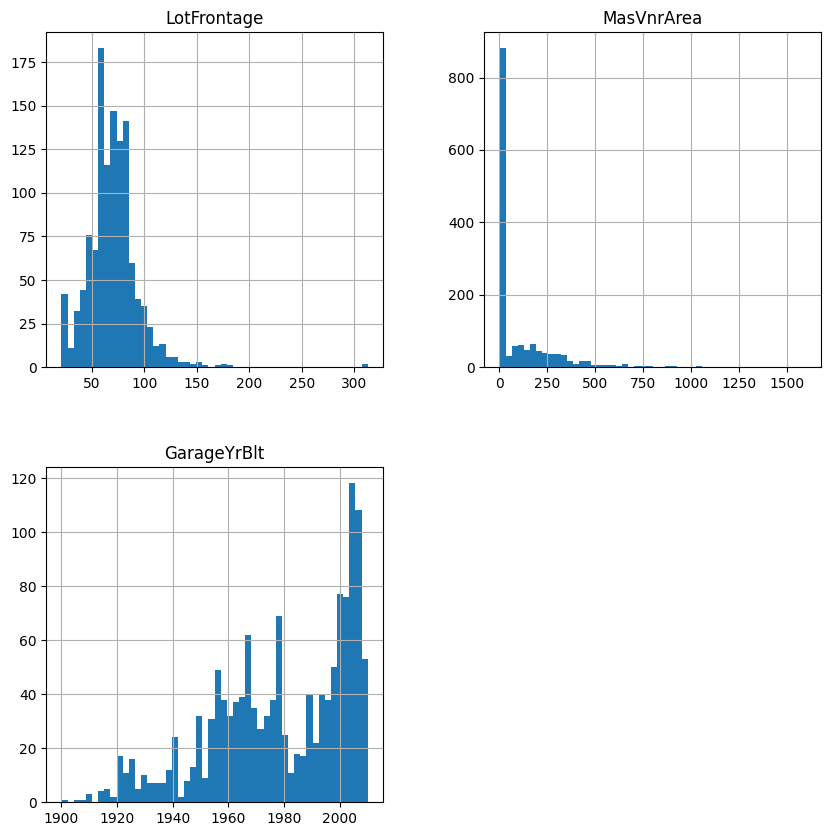

In [18]:
df[['LotFrontage','MasVnrArea','GarageYrBlt']].hist(bins=50, figsize=(10, 10))
plt.show()

In [21]:
# prompt: Plot dist  plot using plotly

import plotly.express as px



# Create the distribution plots using plotly
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
  fig = px.histogram(df, x=col, nbins=50, title=f'Distribution of {col} before imputation')
  fig.show()


In [22]:
imputer = SimpleImputer(strategy="mean").set_output(transform="pandas")

In [24]:
imputer.fit(df)

SimpleImputer()

In [25]:
df_tran = imputer.transform(df)

In [26]:
df_tran.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0
SalePrice,0


In [27]:
import plotly.express as px

# Create the distribution plots using plotly
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
  fig = px.histogram(df_tran, x=col, nbins=50, title=f'Distribution of {col} before imputation')
  fig.show()

In [28]:
df_tran.describe()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,6.099315,103.685262,567.240411,1057.429452,1162.626712,1515.463699,1978.506164,94.244521,180921.195890
std,22.024023,1.382997,180.569112,441.866955,438.705324,386.587738,525.480383,23.994583,125.338794,79442.502883
min,21.000000,1.000000,0.000000,0.000000,0.000000,334.000000,334.000000,1900.000000,0.000000,34900.000000
25%,60.000000,5.000000,0.000000,223.000000,795.750000,882.000000,1129.500000,1962.000000,0.000000,129975.000000
50%,70.049958,6.000000,0.000000,477.500000,991.500000,1087.000000,1464.000000,1978.506164,0.000000,163000.000000
75%,79.000000,7.000000,164.250000,808.000000,1298.250000,1391.250000,1776.750000,2001.000000,168.000000,214000.000000
max,313.000000,10.000000,1600.000000,2336.000000,6110.000000,4692.000000,5642.000000,2010.000000,857.000000,755000.000000


In [29]:
df.describe()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000
mean,70.049958,6.099315,103.685262,567.240411,1057.429452,1162.626712,1515.463699,1978.506164,94.244521,180921.195890
std,24.284752,1.382997,181.066207,441.866955,438.705324,386.587738,525.480383,24.689725,125.338794,79442.502883
min,21.000000,1.000000,0.000000,0.000000,0.000000,334.000000,334.000000,1900.000000,0.000000,34900.000000
25%,59.000000,5.000000,0.000000,223.000000,795.750000,882.000000,1129.500000,1961.000000,0.000000,129975.000000
50%,69.000000,6.000000,0.000000,477.500000,991.500000,1087.000000,1464.000000,1980.000000,0.000000,163000.000000
75%,80.000000,7.000000,166.000000,808.000000,1298.250000,1391.250000,1776.750000,2002.000000,168.000000,214000.000000
max,313.000000,10.000000,1600.000000,2336.000000,6110.000000,4692.000000,5642.000000,2010.000000,857.000000,755000.000000
